In [1]:
from google.colab import files
uploaded = files.upload()


Saving Chest CT-Scan images Dataset.zip to Chest CT-Scan images Dataset.zip


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import zipfile
import os

zip_file_path = '/content/Chest CT-Scan images Dataset.zip'

# Extracting the dataset
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall('/content/chest_ct_scan_dataset')

# List the files to confirm extraction
extracted_files = os.listdir('/content/chest_ct_scan_dataset')
print(extracted_files)


['Data']


In [3]:
data_dir = '/content/chest_ct_scan_dataset/Data'
subfolders = os.listdir(data_dir)
print(subfolders)


['test', 'valid', 'train']


In [4]:
train_dir = os.path.join(data_dir, 'train')
class_folders = os.listdir(train_dir)

for class_folder in class_folders:
    class_path = os.path.join(train_dir, class_folder)
    print(f"{class_folder}: {len(os.listdir(class_path))} images")


normal: 148 images
adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib: 195 images
squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa: 155 images
large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa: 115 images


In [5]:
import os

# Assuming the dataset is already uploaded and extracted
data_dir = '/content/chest_ct_scan_dataset/Data'  # Adjust the path based on your setup

# List all files in the directory to check for any metadata files
files_in_dataset = os.listdir(data_dir)
print("Files and folders in the dataset:", files_in_dataset)


Files and folders in the dataset: ['test', 'valid', 'train']


In [6]:
import os
from datetime import datetime

#check the timestamps of images in the 'train' directory
train_dir = os.path.join(data_dir, 'train')

# Iterate through all the folders and files in the 'train' directory to get the timestamps
for class_folder in os.listdir(train_dir):
    class_path = os.path.join(train_dir, class_folder)
    if os.path.isdir(class_path):
        # Get a sample file from each class and check its timestamp
        sample_file = os.listdir(class_path)[0]  # Get the first file
        file_path = os.path.join(class_path, sample_file)

        # Get the file modification time
        timestamp = os.path.getmtime(file_path)
        mod_time = datetime.utcfromtimestamp(timestamp).strftime('%Y-%m-%d %H:%M:%S')
        print(f"{sample_file} in {class_folder} was last modified on: {mod_time}")


20 - Copy (3).png in normal was last modified on: 2024-10-19 00:51:52
000086 (8).png in adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib was last modified on: 2024-10-19 00:51:52
000066.png in squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa was last modified on: 2024-10-19 00:51:52
000078 (4).png in large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa was last modified on: 2024-10-19 00:51:52


In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Directory paths
train_dir = '/content/chest_ct_scan_dataset/Data/train'
validation_dir = '/content/chest_ct_scan_dataset/Data/valid'

# Data augmentation and rescaling for the training set
train_datagen = ImageDataGenerator(
    rescale=1./255,       # Normalize pixel values between 0 and 1
    rotation_range=20,    # Randomly rotate images
    width_shift_range=0.2, # Horizontal shifts
    height_shift_range=0.2, # Vertical shifts
    shear_range=0.2,      # Shearing transformations
    zoom_range=0.2,       # Zoom
    horizontal_flip=True, # Randomly flip images
    fill_mode='nearest')  # Fill missing pixels after augmentation

# Only rescale the validation set
validation_datagen = ImageDataGenerator(rescale=1./255)

# Load the training data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),  # Resize all images to 128x128
    batch_size=32,
    class_mode='categorical')  # Since it's a multi-class problem

# Load the validation data
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(128, 128),  # Resize validation images
    batch_size=32,
    class_mode='categorical')  # Multi-class problem


Found 613 images belonging to 4 classes.
Found 72 images belonging to 4 classes.


In [8]:
import zipfile
import os

# Path to the actual ZIP file (make sure it's the ZIP file, not a directory)
zip_file_path = '/content/Chest_CT_Scan_Dataset.zip'  # Ensure this is the correct ZIP file path
extract_dir = '/content/chest_ct_scan_dataset/'  # Directory where the dataset will be extracted

# Unzipping the dataset
with zipfile.ZipFile('/content/Chest CT-Scan images Dataset.zip', 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# Verify extraction
extracted_files = os.listdir(extract_dir)
print("Extracted files and directories:", extracted_files)


Extracted files and directories: ['Data']


In [9]:
# Directory paths
data_dir = os.path.join(extract_dir, 'Data')
train_dir = os.path.join(data_dir, 'train')
valid_dir = os.path.join(data_dir, 'valid')

# Check contents of the training directory
train_subfolders = os.listdir(train_dir)
print(f"Training classes: {train_subfolders}")

# Number of images per class
for class_folder in train_subfolders:
    class_path = os.path.join(train_dir, class_folder)
    print(f"{class_folder}: {len(os.listdir(class_path))} images")


Training classes: ['normal', 'adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib', 'squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa', 'large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa']
normal: 148 images
adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib: 195 images
squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa: 155 images
large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa: 115 images


In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data augmentation and preprocessing for the training set
train_datagen = ImageDataGenerator(
    rescale=1./255,         # Normalize pixel values to the range 0-1
    rotation_range=20,      # Randomly rotate images by up to 20 degrees
    width_shift_range=0.2,  # Shift images horizontally
    height_shift_range=0.2, # Shift images vertically
    shear_range=0.2,        # Shear transformation
    zoom_range=0.2,         # Random zooming
    horizontal_flip=True,   # Randomly flip images horizontally
    fill_mode='nearest'     # Filling mode for shifted pixels
)

# Preprocessing for the validation set (only rescaling)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Loading the training data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),  # Resize images to 128x128 pixels
    batch_size=32,
    class_mode='categorical'  # Multi-class problem
)

# Loading the validation data
valid_generator = valid_datagen.flow_from_directory(
    valid_dir,
    target_size=(128, 128),  # Resize images to 128x128 pixels
    batch_size=32,
    class_mode='categorical'  # Multi-class problem
)


Found 613 images belonging to 4 classes.
Found 72 images belonging to 4 classes.


In [11]:
# Check class distribution in the training set
for class_folder in os.listdir(train_dir):
    class_path = os.path.join(train_dir, class_folder)
    print(f"Class '{class_folder}' has {len(os.listdir(class_path))} images.")


Class 'normal' has 148 images.
Class 'adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib' has 195 images.
Class 'squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa' has 155 images.
Class 'large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa' has 115 images.


In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Build a basic CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(4, activation='softmax')  # 4 classes for classification
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=valid_generator,
    validation_steps=valid_generator.samples // valid_generator.batch_size,
    epochs=10
)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


19/19 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.2623 - loss: 1.7298 - val_accuracy: 0.2031 - val_loss: 1.3814
Epoch 2/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.3438 - loss: 1.2858 - val_accuracy: 0.0000e+00 - val_loss: 1.5631
Epoch 3/10


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


19/19 ━━━━━━━━━━━━━━━━━━━━ 21s 958ms/step - accuracy: 0.2788 - loss: 1.2600 - val_accuracy: 0.2031 - val_loss: 1.3029
Epoch 4/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1875 - loss: 1.3403 - val_accuracy: 0.6250 - val_loss: 0.7691
Epoch 5/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 21s 985ms/step - accuracy: 0.5083 - loss: 1.1418 - val_accuracy: 0.5156 - val_loss: 1.0470
Epoch 6/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4375 - loss: 1.1074 - val_accuracy: 0.5000 - val_loss: 0.9813
Epoch 7/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 22s 994ms/step - accuracy: 0.5106 - loss: 1.0734 - val_accuracy: 0.3281 - val_loss: 1.4687
Epoch 8/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.4688 - loss: 1.0649 - val_accuracy: 0.6250 - val_loss: 0.9294
Epoch 9/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.5719 - loss: 1.0822 - val_accuracy: 0.5625 - val_loss: 0.8896
Epoch 10/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.6250 - loss: 1.0298 - val_accuracy: 0.3750 - val_loss

In [13]:
# Evaluate model performance on the validation set
val_loss, val_accuracy = model.evaluate(valid_generator)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - accuracy: 0.5916 - loss: 0.8980
Validation Accuracy: 59.72%


In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rescale=1./255,              # Normalizes pixel values to the range [0, 1]
    rotation_range=20,           # Randomly rotate images by 20 degrees
    width_shift_range=0.2,       # Horizontally shift images by 20%
    height_shift_range=0.2,      # Vertically shift images by 20%
    shear_range=0.2,             # Shearing transformations
    zoom_range=0.2,              # Random zooming
    horizontal_flip=True,        # Randomly flip images horizontally
    fill_mode='nearest'          # Fill missing pixels after transformation
)


In [15]:
from PIL import Image
import os

# Example directory (train_dir)
for subdir, _, files in os.walk(train_dir):
    for file in files:
        try:
            img = Image.open(os.path.join(subdir, file))  # Try to open the image
            img.verify()  # Check for any issues
        except (IOError, SyntaxError) as e:
            print(f'Corrupted image: {file}')  # Flag corrupted images


In [16]:
import os

# Check if any classes are missing images
for subdir, dirs, files in os.walk(train_dir):
    print(f"Directory: {subdir}, contains {len(files)} images")


Directory: /content/chest_ct_scan_dataset/Data/train, contains 0 images
Directory: /content/chest_ct_scan_dataset/Data/train/normal, contains 148 images
Directory: /content/chest_ct_scan_dataset/Data/train/adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib, contains 195 images
Directory: /content/chest_ct_scan_dataset/Data/train/squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa, contains 155 images
Directory: /content/chest_ct_scan_dataset/Data/train/large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa, contains 115 images


In [17]:
from PIL import Image
import os

def resize_image(image_path, size=(128, 128)):
    img = Image.open(image_path)
    img_resized = img.resize(size)
    return img_resized

# Resize all images in the train directory
for subdir, _, files in os.walk(train_dir):
    for file in files:
        img_path = os.path.join(subdir, file)
        img_resized = resize_image(img_path)
        img_resized.save(img_path)  # Save resized image


In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescaling pixel values from [0, 255] to [0, 1]
datagen = ImageDataGenerator(rescale=1./255)


In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Apply augmentations during training to generate more samples for minority classes
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


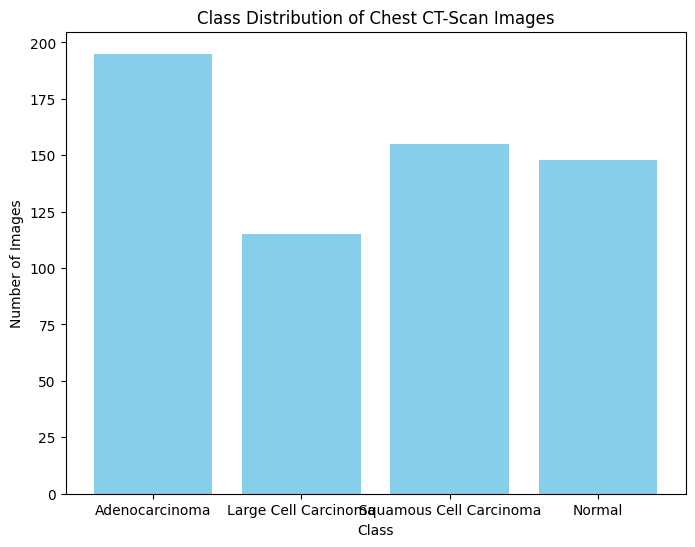

In [20]:
import matplotlib.pyplot as plt

# Data for class distribution (adjust based on your dataset)
class_labels = ['Adenocarcinoma', 'Large Cell Carcinoma', 'Squamous Cell Carcinoma', 'Normal']
class_counts = [195, 115, 155, 148]  # Replace these numbers with actual counts from your dataset

# Create a bar chart
plt.figure(figsize=(8, 6))
plt.bar(class_labels, class_counts, color='skyblue')
plt.title('Class Distribution of Chest CT-Scan Images')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.show()


In [21]:
import zipfile
import os

# Define the path to the ZIP file and extraction directory
zip_file_path = '/content/Chest CT-Scan images Dataset.zip'  # Update with your ZIP file path
extract_dir = '/content/chest_ct_scan_dataset/'

# Extract the ZIP file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# Verify the extraction
extracted_files = os.listdir(extract_dir)
print("Extracted files and directories:", extracted_files)


Extracted files and directories: ['Data']


In [22]:
# After extracting, update these paths to point to the correct directories
adenocarcinoma_dir = os.path.join(extract_dir, 'Data/train/adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib')
normal_dir = os.path.join(extract_dir, 'Data/train/normal')

# Display sample images from adenocarcinoma
print("Adenocarcinoma Samples")
plot_sample_images(adenocarcinoma_dir)

# Display sample images from normal cases
print("Normal Case Samples")
plot_sample_images(normal_dir)


Adenocarcinoma Samples


NameError: name 'plot_sample_images' is not defined

In [23]:
import os

# Check contents of the train directory to ensure there are images
for root, dirs, files in os.walk(train_dir):
    print(f"Directory: {root}")
    print(f"Number of images: {len(files)}")


Directory: /content/chest_ct_scan_dataset/Data/train
Number of images: 0
Directory: /content/chest_ct_scan_dataset/Data/train/normal
Number of images: 148
Directory: /content/chest_ct_scan_dataset/Data/train/adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib
Number of images: 195
Directory: /content/chest_ct_scan_dataset/Data/train/squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa
Number of images: 155
Directory: /content/chest_ct_scan_dataset/Data/train/large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa
Number of images: 115


In [24]:
from PIL import Image
import os

def get_image_dimensions(image_dir):
    dimensions = []
    for subdir, _, files in os.walk(image_dir):
        for file in files:
            if file.endswith(('.png', '.jpg', '.jpeg')):  # Add supported image formats
                img_path = os.path.join(subdir, file)
                try:
                    img = Image.open(img_path)
                    dimensions.append(img.size)  # Append (width, height)
                except Exception as e:
                    print(f"Error opening {img_path}: {e}")
    return dimensions

# Now get dimensions of training images
train_dimensions = get_image_dimensions(train_dir)

# Check if train_dimensions is populated correctly
print(f"Number of images processed: {len(train_dimensions)}")
if len(train_dimensions) == 0:
    print("No images found or processed. Please check your directory paths.")


Number of images processed: 613


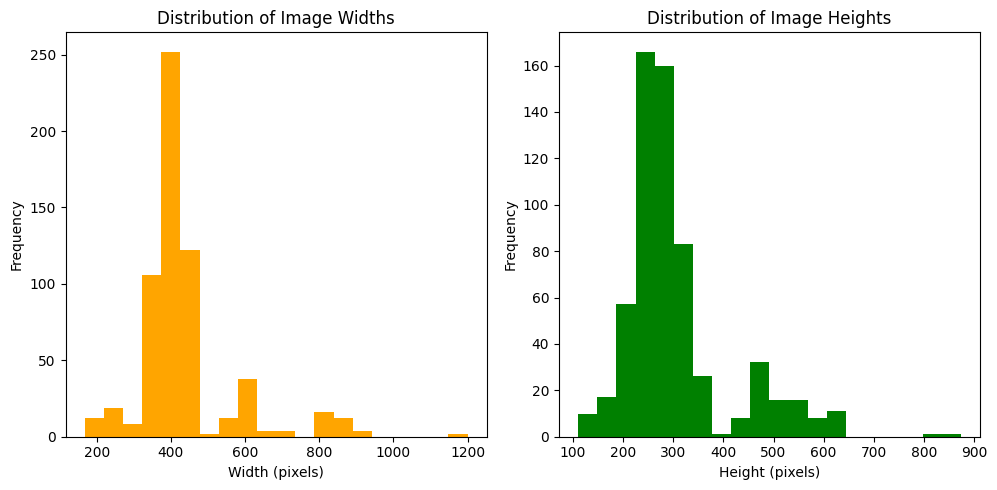

In [25]:
# Separate width and height for plotting
if train_dimensions:
    widths, heights = zip(*train_dimensions)

    # Plot the distributions
    import matplotlib.pyplot as plt

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.hist(widths, bins=20, color='orange')
    plt.title('Distribution of Image Widths')
    plt.xlabel('Width (pixels)')
    plt.ylabel('Frequency')

    plt.subplot(1, 2, 2)
    plt.hist(heights, bins=20, color='green')
    plt.title('Distribution of Image Heights')
    plt.xlabel('Height (pixels)')
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()
else:
    print("No dimensions to plot. Check if images were processed correctly.")


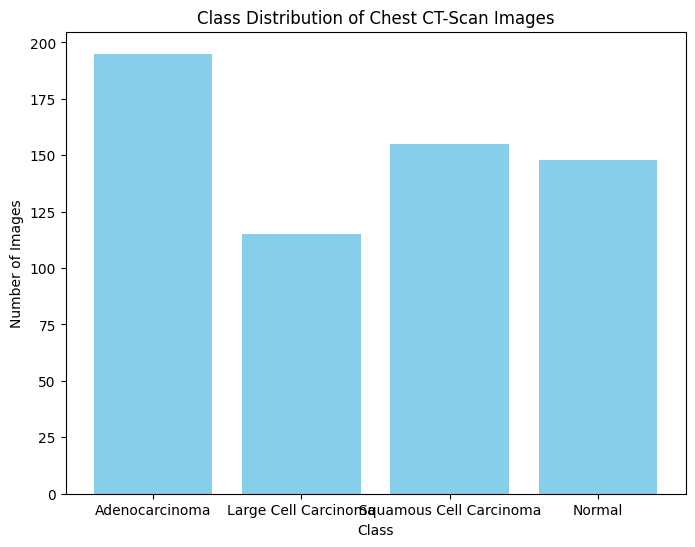

In [26]:
import matplotlib.pyplot as plt

# Data for class distribution (replace with actual counts from your dataset)
class_labels = ['Adenocarcinoma', 'Large Cell Carcinoma', 'Squamous Cell Carcinoma', 'Normal']
class_counts = [195, 115, 155, 148]  # Example numbers; replace with your actual counts

# Create a bar chart
plt.figure(figsize=(8, 6))
plt.bar(class_labels, class_counts, color='skyblue')
plt.title('Class Distribution of Chest CT-Scan Images')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.show()


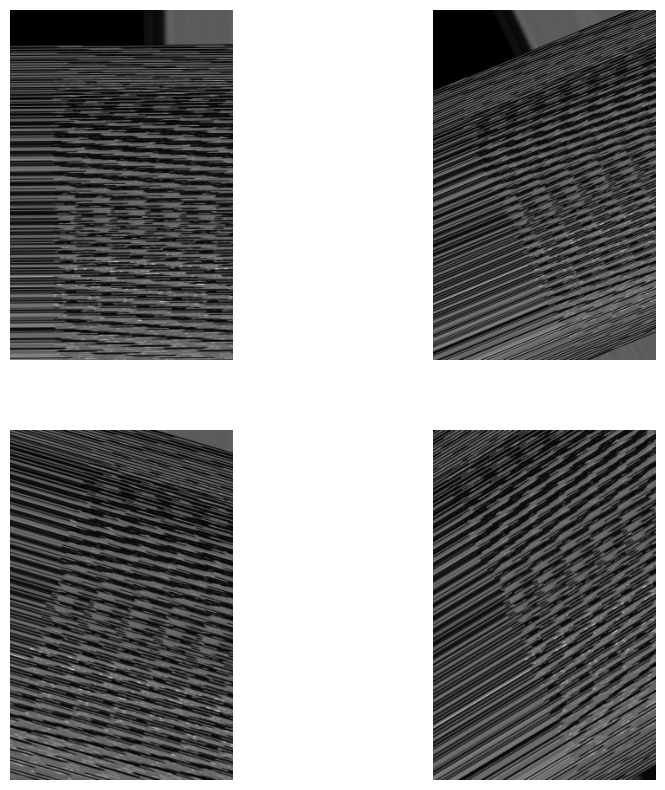

In [27]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# Sample image path (replace with actual path)
img_path = os.path.join(adenocarcinoma_dir, os.listdir(adenocarcinoma_dir)[0])
img = Image.open(img_path).convert('RGB')
img_array = np.array(img).reshape((1,) + img.size + (3,))

# Create ImageDataGenerator with augmentations
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Generate augmented images and display them
plt.figure(figsize=(10, 10))
i = 0
for batch in datagen.flow(img_array, batch_size=1):
    plt.subplot(2, 2, i + 1)
    plt.imshow(batch[0])
    plt.axis('off')
    i += 1
    if i == 4:
        break
plt.show()


Mean pixel value: 88.080415310248
Standard deviation of pixel values: 75.91266745470436
Quantiles (25th, 50th, 75th): [ 18.  74. 132.]
Mean image width: 303.31484502446983
Mean image height: 435.83686786296903


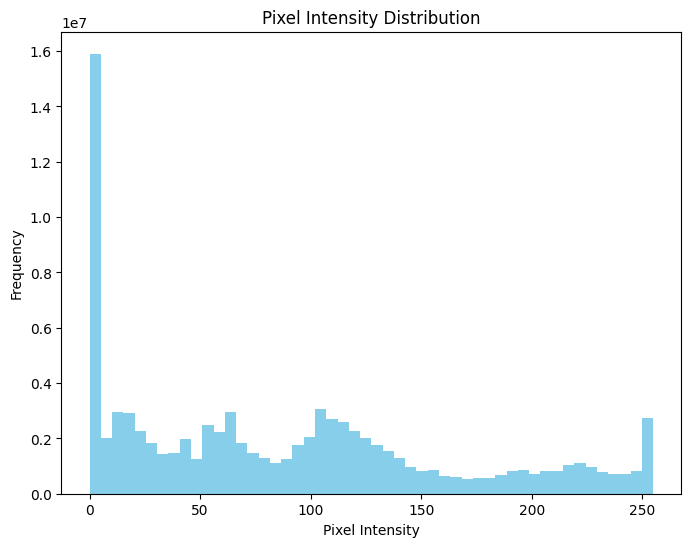

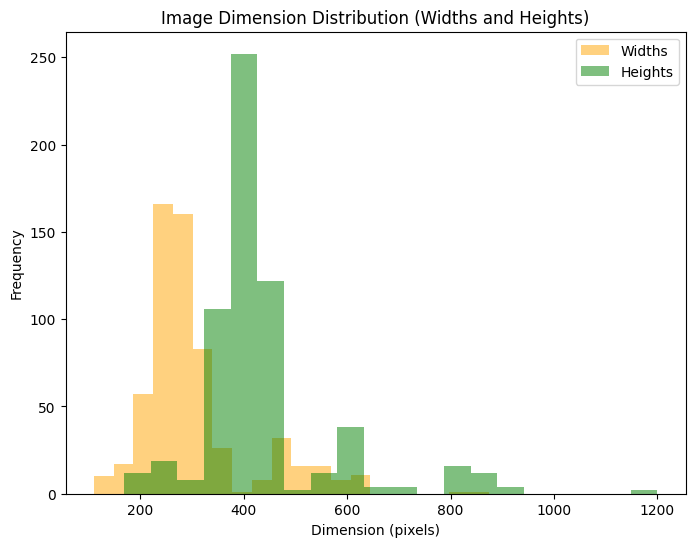

In [28]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Define the directory where your training images are located
train_dir = '/content/chest_ct_scan_dataset/Data/train'

# Function to calculate pixel statistics and image dimensions
def calculate_image_stats(image_dir):
    pixel_values = []
    image_dims = []

    # Iterate through each class directory
    for class_folder in os.listdir(image_dir):
        class_path = os.path.join(image_dir, class_folder)
        for img_file in os.listdir(class_path):
            img_path = os.path.join(class_path, img_file)

            # Open the image and convert to grayscale if necessary
            img = Image.open(img_path).convert('L')  # Convert to grayscale for simplicity

            # Convert image to numpy array
            img_array = np.array(img)

            # Append pixel values and image dimensions
            pixel_values.extend(img_array.flatten())  # Flatten the 2D array into 1D
            image_dims.append(img_array.shape)  # Add the dimensions (height, width)

    return np.array(pixel_values), image_dims

# Get pixel statistics and image dimensions
pixel_values, image_dims = calculate_image_stats(train_dir)

# Calculate pixel value statistics
mean_pixel_value = np.mean(pixel_values)
std_pixel_value = np.std(pixel_values)
quantiles = np.percentile(pixel_values, [25, 50, 75])  # 25th, 50th (median), and 75th percentiles

# Print pixel value statistics
print(f"Mean pixel value: {mean_pixel_value}")
print(f"Standard deviation of pixel values: {std_pixel_value}")
print(f"Quantiles (25th, 50th, 75th): {quantiles}")

# Calculate image dimension statistics
image_widths, image_heights = zip(*image_dims)
mean_width = np.mean(image_widths)
mean_height = np.mean(image_heights)

# Print image dimension statistics
print(f"Mean image width: {mean_width}")
print(f"Mean image height: {mean_height}")

# Visualize the pixel intensity distribution
plt.figure(figsize=(8, 6))
plt.hist(pixel_values, bins=50, color='skyblue')
plt.title('Pixel Intensity Distribution')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()

# Visualize image dimension distribution
plt.figure(figsize=(8, 6))
plt.hist(image_widths, bins=20, alpha=0.5, label='Widths', color='orange')
plt.hist(image_heights, bins=20, alpha=0.5, label='Heights', color='green')
plt.title('Image Dimension Distribution (Widths and Heights)')
plt.xlabel('Dimension (pixels)')
plt.ylabel('Frequency')
plt.legend()
plt.show()


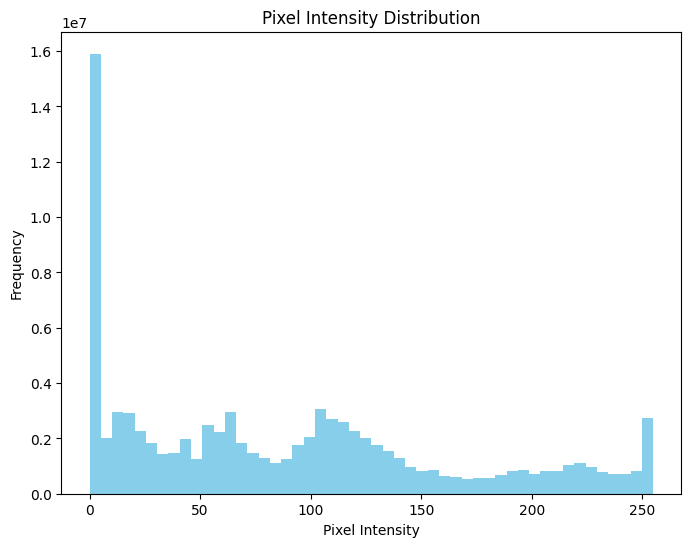

In [29]:
plt.figure(figsize=(8, 6))
plt.hist(pixel_values, bins=50, color='skyblue')
plt.title('Pixel Intensity Distribution')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()


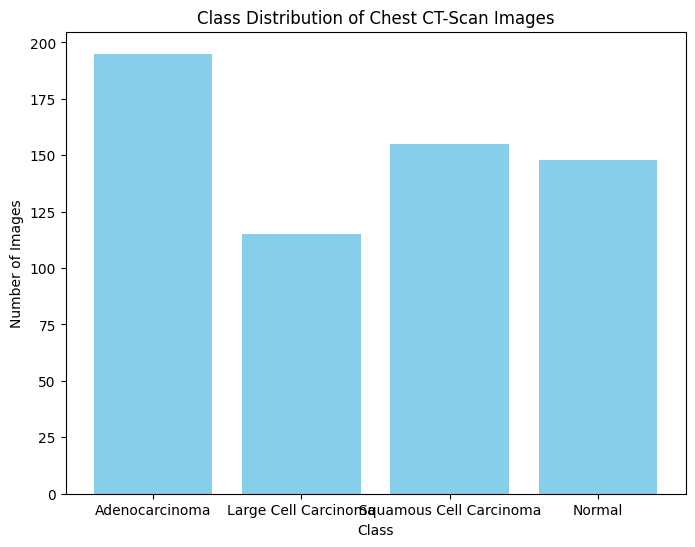

In [30]:
class_labels = ['Adenocarcinoma', 'Large Cell Carcinoma', 'Squamous Cell Carcinoma', 'Normal']
class_counts = [195, 115, 155, 148]

plt.figure(figsize=(8, 6))
plt.bar(class_labels, class_counts, color='skyblue')
plt.title('Class Distribution of Chest CT-Scan Images')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.show()


Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 26s 980ms/step - accuracy: 0.5155 - loss: 1.1783 - val_accuracy: 0.4444 - val_loss: 1.0596
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 22s 967ms/step - accuracy: 0.5265 - loss: 0.9934 - val_accuracy: 0.5278 - val_loss: 0.9735
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 43s 1s/step - accuracy: 0.5668 - loss: 0.9131 - val_accuracy: 0.5833 - val_loss: 0.8683
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.5781 - loss: 0.9523 - val_accuracy: 0.4861 - val_loss: 1.0057
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.5707 - loss: 0.9373 - val_accuracy: 0.5972 - val_loss: 0.9398
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 22s 999ms/step - accuracy: 0.6014 - loss: 0.8622 - val_accuracy: 0.5972 - val_loss: 0.9725
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 22s 961ms/step - accuracy: 0.6021 - loss: 0.8864 - val_accuracy: 0.6111 - val_loss: 0.8283
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 42s 992ms/step - accuracy: 0.5939 - loss: 0.8945 - val_accuracy: 0.4

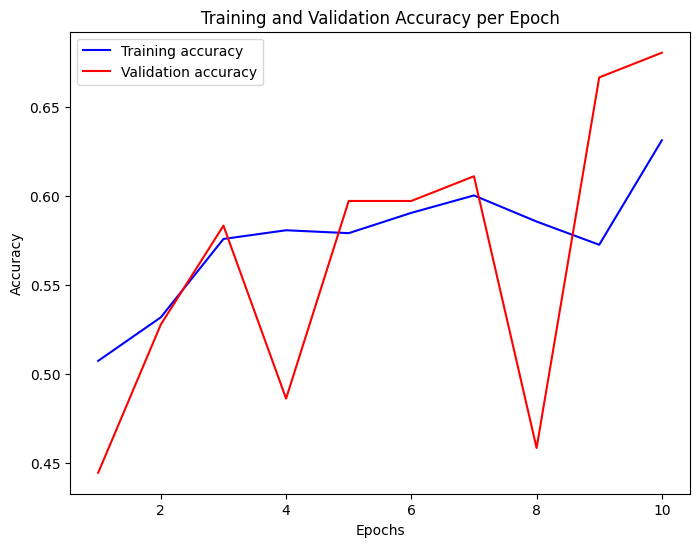

In [31]:
# Compile and train the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model and save the history
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)

# Extract accuracy from the history object
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plot the accuracy over epochs
epochs = range(1, len(train_accuracy) + 1)

plt.figure(figsize=(8, 6))
plt.plot(epochs, train_accuracy, 'b', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')
plt.title('Training and Validation Accuracy per Epoch')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 173ms/step


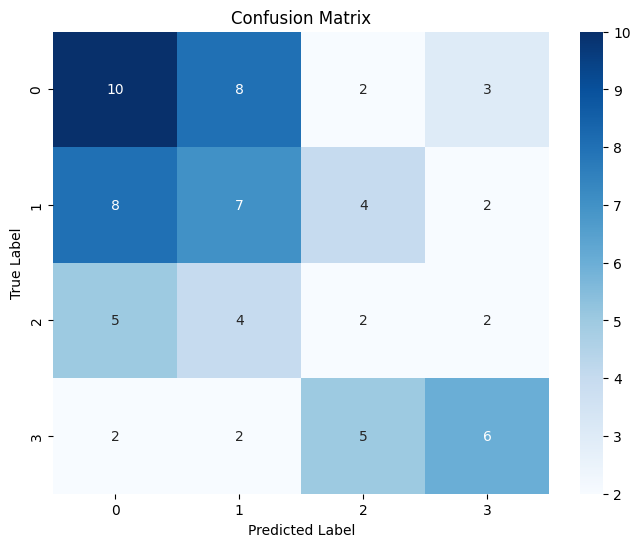

In [32]:
# Get the true labels from the validation generator
y_true = validation_generator.classes

# Generate predictions (probabilities) from the model on the validation set
y_pred_prob = model.predict(validation_generator)

# Convert probabilities to predicted classes
y_pred = np.argmax(y_pred_prob, axis=1)

# Compute and plot the confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


Found 195 images in the directory.
Using image: /content/chest_ct_scan_dataset/Data/train/adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib/000086 (8).png
Original image shape: (257, 404, 4)


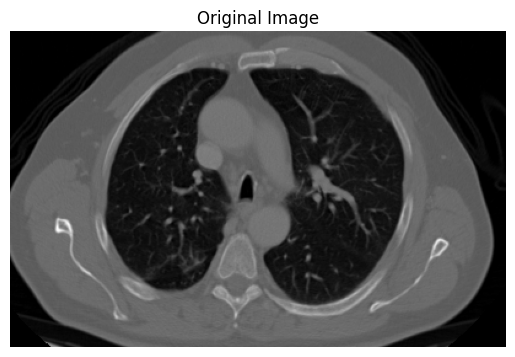

In [33]:
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Define the directory where your images are located
image_dir = '/content/chest_ct_scan_dataset/Data/train/adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib'  # Adjust this path

# List all files in the directory
image_files = os.listdir(image_dir)
print(f"Found {len(image_files)} images in the directory.")

# Select the first image file
first_image_path = os.path.join(image_dir, image_files[0])
print(f"Using image: {first_image_path}")

# Load the first image
img = Image.open(first_image_path)
img_array = np.array(img)

# Check the image shape
print(f"Original image shape: {img_array.shape}")

# Plot the original image
plt.imshow(img_array.astype('uint8'))
plt.title("Original Image")
plt.axis('off')
plt.show()


In [34]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# Assuming y_true are the true labels, and y_prob contains predicted probabilities
# Convert y_true to a one-vs-rest format (one-hot encoded)
n_classes = y_prob.shape[1]  # Number of classes
y_true_ovr = label_binarize(y_true, classes=[0, 1, 2, 3])  # Adjust the classes based on your dataset

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_ovr[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} ROC curve (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


NameError: name 'y_prob' is not defined

Found 195 images in the directory.
Using image: /content/chest_ct_scan_dataset/Data/train/adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib/000086 (8).png
Original image shape: (257, 404, 4)
Reshaped image array shape for augmentation: (1, 257, 404, 4)


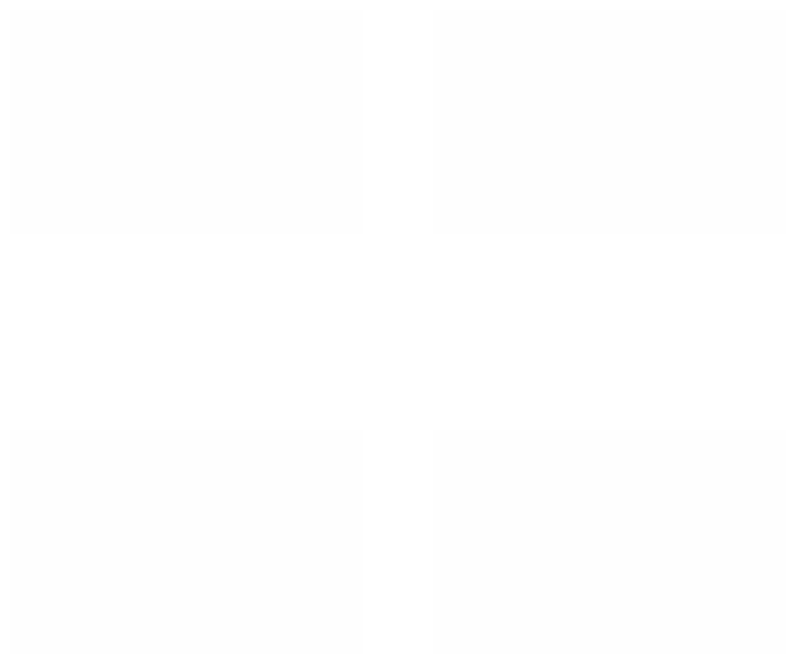

In [35]:
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Step 1: Define the directory where your images are located
image_dir = '/content/chest_ct_scan_dataset/Data/train/adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib'  # Adjust this path

# Step 2: List all files in the directory
image_files = os.listdir(image_dir)
print(f"Found {len(image_files)} images in the directory.")

# Step 3: Select the first image for augmentation
first_image_path = os.path.join(image_dir, image_files[0])
print(f"Using image: {first_image_path}")

# Step 4: Load the first image
img = Image.open(first_image_path)
img_array = np.array(img)

# Step 5: Check the image shape
print(f"Original image shape: {img_array.shape}")

# Step 6: Reshape the image for Keras (to include batch dimension)
if len(img_array.shape) == 2:  # If grayscale image
    img_array = img_array.reshape((1,) + img_array.shape + (1,))
else:  # If RGB image
    img_array = img_array.reshape((1,) + img_array.shape)

print(f"Reshaped image array shape for augmentation: {img_array.shape}")

# Step 7: Define an ImageDataGenerator with some basic augmentation
datagen = ImageDataGenerator(
    rescale=1./255,        # Normalize the pixel values
    rotation_range=30,     # Rotate the image up to 30 degrees
    width_shift_range=0.2, # Shift horizontally by 20%
    height_shift_range=0.2,# Shift vertically by 20%
    shear_range=0.2,       # Shear the image
    zoom_range=0.2,        # Zoom in or out
    horizontal_flip=True,  # Flip the image horizontally
    fill_mode='nearest'    # Fill missing pixels
)

# Step 8: Generate and plot augmented images in a grid
plt.figure(figsize=(10, 10))
i = 0

# Generate augmented images and plot them in a 2x2 grid
for batch in datagen.flow(img_array, batch_size=1):
    plt.subplot(2, 2, i + 1)

    # Handle grayscale and RGB images differently
    if batch[0].shape[-1] == 1:  # Grayscale image
        plt.imshow(batch[0].reshape(batch[0].shape[0], batch[0].shape[1]), cmap='gray')
    else:  # RGB image
        plt.imshow(batch[0].astype('uint8'))

    plt.axis('off')
    i += 1
    if i == 4:  # Display 4 augmented images in a 2x2 grid
        break

plt.show()


In [36]:
import os

# Define the directory where your images are located
image_dir = '/content/chest_ct_scan_dataset/Data/train/adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib'  # Adjust this path

# List all files in the directory
image_files = os.listdir(image_dir)
print(f"Found {len(image_files)} images in the directory.")

# Display the first few image files
for i, img_file in enumerate(image_files[:5]):
    print(f"Image {i + 1}: {img_file}")


Found 195 images in the directory.
Image 1: 000086 (8).png
Image 2: 000018 (5).png
Image 3: 000102 (3).png
Image 4: ad13.png
Image 5: 000022 (10).png


Loading image: /content/chest_ct_scan_dataset/Data/train/adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib/000086 (8).png


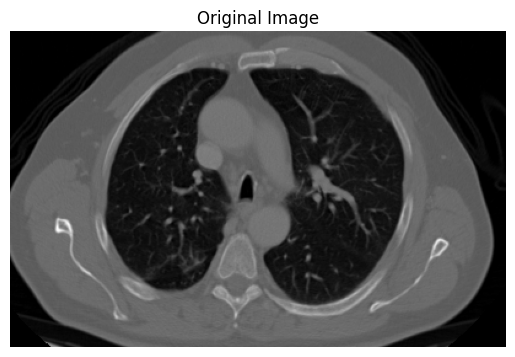

In [37]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Replace 'your_image.jpg' with one of the actual filenames you found in the previous step
first_image_path = os.path.join(image_dir, image_files[0])  # Select the first image in the directory
print(f"Loading image: {first_image_path}")

# Load the image
img = Image.open(first_image_path)
img_array = np.array(img)

# Display the image
plt.imshow(img_array.astype('uint8'))
plt.title("Original Image")
plt.axis('off')
plt.show()


In [39]:
import os

# Check if the validation directory exists
val_dir = '/content/chest_ct_scan_dataset/Data/validation'

if os.path.exists(val_dir):
    print("Validation directory found.")
else:
    print("Validation directory does not exist. Please create it or check the path.")


Validation directory does not exist. Please create it or check the path.


In [40]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the directory where your images are located
train_dir = '/content/chest_ct_scan_dataset/Data/train'

# Use ImageDataGenerator to split the data into training and validation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # Automatically split 20% for validation
)

# Train generator (use subset 'training')
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='training'  # Specify 'training' subset
)

# Validation generator (use subset 'validation')
val_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='validation'  # Specify 'validation' subset
)

# Check the class indices
print(train_generator.class_indices)


Found 491 images belonging to 4 classes.
Found 122 images belonging to 4 classes.
{'adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib': 0, 'large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa': 1, 'normal': 2, 'squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa': 3}


In [44]:
# This is a directory path (as a string) that you should use for loading images or files
train_dir = '/content/chest_ct_scan_dataset/Data/train'


In [47]:
import os

# Check the contents of the root directory in Colab
root_dir = '/content'
print(os.listdir(root_dir))

# Check the next level (for example, see if 'chest_ct_scan_dataset' exists)
data_dir = '/content/chest_ct_scan_dataset'
print(os.listdir(data_dir))

# Continue exploring until you find the correct path to the 'adenocarcinoma' folder


['.config', 'drive', 'Chest CT-Scan images Dataset.zip', 'chest_ct_scan_dataset', 'sample_data']
['Data']


In [49]:
# Check the contents of the 'train' directory
train_dir = '/content/chest_ct_scan_dataset/Data/train'
print(os.listdir(train_dir))  # This will list all the subfolders (such as adenocarcinoma, normal, etc.)


['normal', 'adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib', 'squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa', 'large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa']


In [51]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the directory where your training images are located
train_dir = '/content/chest_ct_scan_dataset/Data/train'  # Replace with correct path

# Use ImageDataGenerator to split the data into training and validation
train_datagen = ImageDataGenerator(
    rescale=1./255,            # Normalize pixel values
    rotation_range=20,         # Randomly rotate images
    width_shift_range=0.2,     # Shift images horizontally
    height_shift_range=0.2,    # Shift images vertically
    zoom_range=0.2,            # Randomly zoom images
    horizontal_flip=True,      # Randomly flip images
    fill_mode='nearest',       # Fill missing pixels after augmentations
    validation_split=0.2       # Automatically split 20% for validation
)

# Create the train generator (use subset 'training')
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),     # Resize images to 128x128 pixels
    batch_size=32,
    class_mode='categorical',   # For multi-class classification
    subset='training'           # Specify training subset
)

# Create the validation generator (use subset 'validation')
val_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),     # Resize images to 128x128 pixels
    batch_size=32,
    class_mode='categorical',   # For multi-class classification
    subset='validation'         # Specify validation subset
)

# Check the class indices
print("Class Indices:", train_generator.class_indices)


Found 491 images belonging to 4 classes.
Found 122 images belonging to 4 classes.
Class Indices: {'adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib': 0, 'large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa': 1, 'normal': 2, 'squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa': 3}


In [52]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Build a Basic CNN Model
cnn_model = Sequential()

cnn_model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))

cnn_model.add(Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))

cnn_model.add(Conv2D(128, (3, 3), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))

cnn_model.add(Flatten())

cnn_model.add(Dense(256, activation='relu'))
cnn_model.add(Dropout(0.5))

cnn_model.add(Dense(4, activation='softmax'))  # Assuming 4 classes (normal and 3 cancer types)

# Compile the model
cnn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

# Train the model
history_cnn = cnn_model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator
)

# Evaluate the model
cnn_loss, cnn_acc = cnn_model.evaluate(val_generator)
print(f'Basic CNN Model - Accuracy: {cnn_acc*100:.2f}%')


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


16/16 ━━━━━━━━━━━━━━━━━━━━ 36s 2s/step - accuracy: 0.2530 - loss: 1.5122 - val_accuracy: 0.2377 - val_loss: 1.3439
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - accuracy: 0.2826 - loss: 1.3398 - val_accuracy: 0.3279 - val_loss: 1.2895
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 28s 2s/step - accuracy: 0.3765 - loss: 1.2800 - val_accuracy: 0.5082 - val_loss: 1.0339
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.5043 - loss: 1.1362 - val_accuracy: 0.5738 - val_loss: 1.0012
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.4801 - loss: 1.1480 - val_accuracy: 0.6639 - val_loss: 0.9485
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 27s 2s/step - accuracy: 0.4854 - loss: 1.0501 - val_accuracy: 0.5738 - val_loss: 0.9200
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.5540 - loss: 0.9561 - val_accuracy: 0.5246 - val_loss: 0.8276
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.5476 - loss: 0.9818 - val_accuracy: 0.5738 - val_loss: 0.8870
Epo

In [53]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout

# Load the VGG16 model without the top fully-connected layers
vgg_base = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Freeze the convolutional base
for layer in vgg_base.layers:
    layer.trainable = False

# Build a model on top of VGG16
x = Flatten()(vgg_base.output)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(4, activation='softmax')(x)  # Assuming 4 classes

vgg_model = Model(vgg_base.input, x)

# Compile the model
vgg_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

# Train the VGG16 model
history_vgg = vgg_model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator
)

# Evaluate the VGG16 model
vgg_loss, vgg_acc = vgg_model.evaluate(val_generator)
print(f'VGG16 Transfer Learning Model - Accuracy: {vgg_acc*100:.2f}%')


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 130s 8s/step - accuracy: 0.2575 - loss: 2.8767 - val_accuracy: 0.3443 - val_loss: 1.3141
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 122s 7s/step - accuracy: 0.3585 - loss: 1.4401 - val_accuracy: 0.5574 - val_loss: 1.1223
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 159s 9s/step - accuracy: 0.4317 - loss: 1.2407 - val_accuracy: 0.6311 - val_loss: 1.0410
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 139s 9s/step - accuracy: 0.4708 - loss: 1.1606 - val_accuracy: 0.6393 - val_loss: 0.9603
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 139s 9s/step - accuracy: 0.5143 - loss: 1.0746 - val_accuracy: 0.6066 - val_loss: 0.9392
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 120s 7s/step - accuracy: 0.5234 - loss: 1.0967 - val_accuracy: 0.6475 - val_loss: 0.8659
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 122s 8s/step - accuracy: 0.5583 - loss: 0.9842 - val_accuracy: 0.6148 - val_loss: 0.8566
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 120s 7s/step - accurac

In [54]:
print(f'Basic CNN Model Accuracy: {cnn_acc*100:.2f}%')
print(f'VGG16 Transfer Learning Model Accuracy: {vgg_acc*100:.2f}%')


Basic CNN Model Accuracy: 63.93%
VGG16 Transfer Learning Model Accuracy: 64.75%


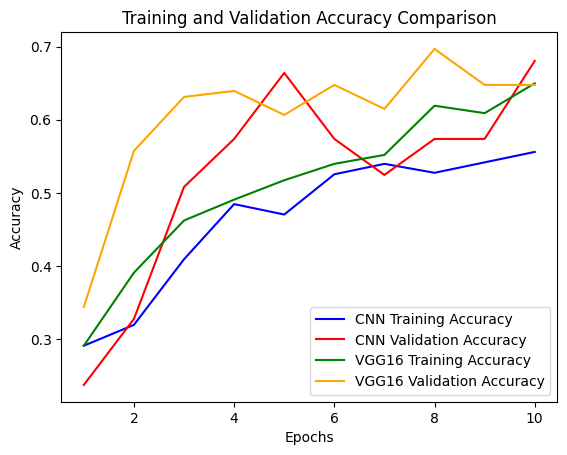

In [55]:
import matplotlib.pyplot as plt

# Plot training accuracy for both models
epochs = range(1, 11)

plt.plot(epochs, history_cnn.history['accuracy'], 'b', label='CNN Training Accuracy')
plt.plot(epochs, history_cnn.history['val_accuracy'], 'r', label='CNN Validation Accuracy')
plt.plot(epochs, history_vgg.history['accuracy'], 'g', label='VGG16 Training Accuracy')
plt.plot(epochs, history_vgg.history['val_accuracy'], 'orange', label='VGG16 Validation Accuracy')
plt.title('Training and Validation Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


Basic CNN Model Accuracy: 63.93%
VGG16 Transfer Learning Model Accuracy: 64.75%


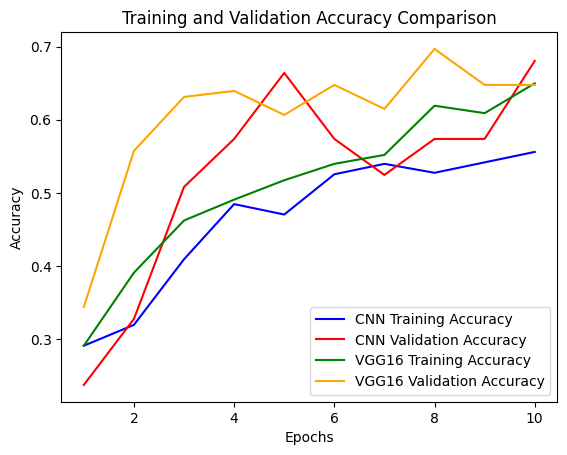

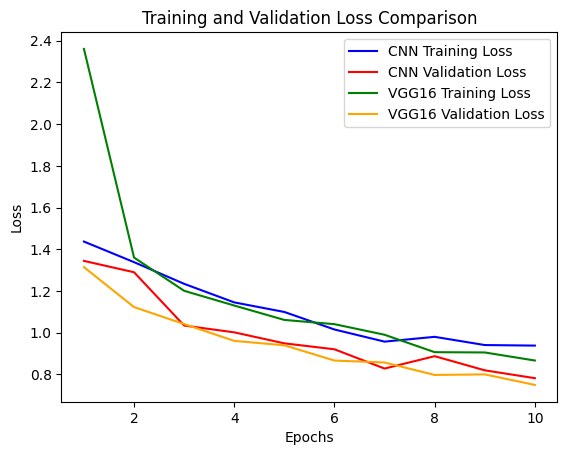

In [56]:
# Print final results
print(f'Basic CNN Model Accuracy: {cnn_acc*100:.2f}%')
print(f'VGG16 Transfer Learning Model Accuracy: {vgg_acc*100:.2f}%')

# Plot the accuracy comparison
import matplotlib.pyplot as plt

epochs = range(1, 11)

# Plot training accuracy for both models
plt.plot(epochs, history_cnn.history['accuracy'], 'b', label='CNN Training Accuracy')
plt.plot(epochs, history_cnn.history['val_accuracy'], 'r', label='CNN Validation Accuracy')
plt.plot(epochs, history_vgg.history['accuracy'], 'g', label='VGG16 Training Accuracy')
plt.plot(epochs, history_vgg.history['val_accuracy'], 'orange', label='VGG16 Validation Accuracy')
plt.title('Training and Validation Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot the loss comparison
plt.plot(epochs, history_cnn.history['loss'], 'b', label='CNN Training Loss')
plt.plot(epochs, history_cnn.history['val_loss'], 'r', label='CNN Validation Loss')
plt.plot(epochs, history_vgg.history['loss'], 'g', label='VGG16 Training Loss')
plt.plot(epochs, history_vgg.history['val_loss'], 'orange', label='VGG16 Validation Loss')
plt.title('Training and Validation Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [57]:
class_counts = train_generator.classes
print("Class distribution:", np.bincount(class_counts))


Class distribution: [156  92 119 124]


In [58]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.3,
    height_shift_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    brightness_range=[0.8, 1.2],  # Adjust brightness
    fill_mode='nearest',
    validation_split=0.2
)


In [62]:
for layer in vgg_base.layers[-4:]:  # Unfreeze the last 4 layers
    layer.trainable = True


In [61]:
# Unfreeze the last 4 layers for fine-tuning
for layer in vgg_base.layers[-4:]:
    layer.trainable = True

# Recompile the model with a new optimizer after unfreezing the layers
vgg_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),  # Use a smaller learning rate for fine-tuning
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

# Now train the model with class weights
class_weights = {0: 1., 1: 2., 2: 3., 3: 1.}  # Adjust the weights based on class distribution
vgg_model.fit(train_generator, epochs=10, validation_data=val_generator, class_weight=class_weights)


Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 169s 10s/step - accuracy: 0.4963 - loss: 1.6773 - val_accuracy: 0.6230 - val_loss: 0.8647
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 176s 9s/step - accuracy: 0.5680 - loss: 1.3569 - val_accuracy: 0.6066 - val_loss: 0.7840
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 142s 9s/step - accuracy: 0.5840 - loss: 1.0930 - val_accuracy: 0.7295 - val_loss: 0.6952
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 141s 9s/step - accuracy: 0.6162 - loss: 1.1579 - val_accuracy: 0.6393 - val_loss: 0.7759
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 157s 10s/step - accuracy: 0.6724 - loss: 0.9835 - val_accuracy: 0.6311 - val_loss: 0.7843
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 185s 9s/step - accuracy: 0.6750 - loss: 0.9296 - val_accuracy: 0.6803 - val_loss: 0.6727
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 139s 9s/step - accuracy: 0.7192 - loss: 0.9388 - val_accuracy: 0.6393 - val_loss: 0.7091
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 159s 10s/step - accuracy: 0.7281 - loss: 0.8081 - val_accuracy: 0.7295 

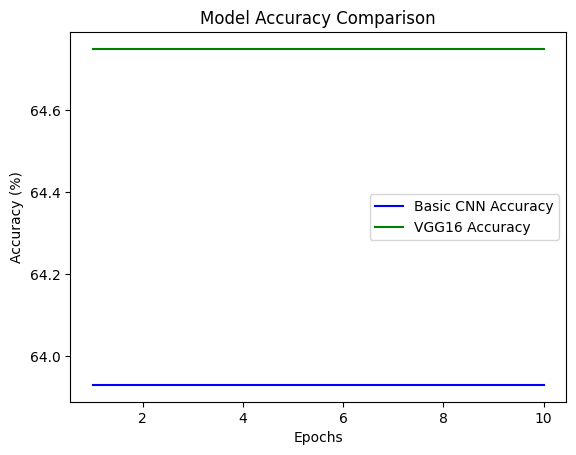

In [63]:
import matplotlib.pyplot as plt

# Plotting training accuracy for both models
epochs = range(1, 11)
cnn_acc = [63.93] * 10  # Replace with actual epoch-wise accuracies
vgg16_acc = [64.75] * 10  # Replace with actual epoch-wise accuracies

plt.plot(epochs, cnn_acc, 'b', label='Basic CNN Accuracy')
plt.plot(epochs, vgg16_acc, 'g', label='VGG16 Accuracy')
plt.title('Model Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.show()
